# Sample Machine Learning Midterm With Solution

In this exam, you will demonstrate your understanding of the material from the lectures, tutorials, and problem sets.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.

Note that you have **2.5 hours** to do the exam. Also note that there is at least one short answer question that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (20 points)

Suppose you enjoy running for exercise, have great data science skills, and would like to build tools to help runners train effectively. You would like to predict a runner's future performance based on his or her past performances, and perhaps come up with some analytics about his or her fitness (increasing, decreasing, etc.)

Consider the training and testing data given in the cell below. The data are measurements of your teacher's runs from mid June to mid September 2019. The $\mathtt{X}$ data contain variables for pace, distance, average temperature, and the number of hours of rest since the last run. The $\mathbf{y}$ data are the average heart rate in beats per minute over each run. These data come from Garmin and OpenWeatherMap.


In [52]:
import numpy as np

# Columns:
# 0: average pace in minutes per kilometer
# 1: distance in meters
# 2: avg apparent temperature (Farenheight, includes humidity factor etc.)
# 3: number of hours of rest since the last run

Xtrain = np.array(
      [[5.6041250e+00, 1.0386240e+04, 9.6480003e+01, 1.6693195e+02],
       [4.5901036e+00, 3.3501699e+03, 9.0070000e+01, 1.4042222e+01],
       [5.5853438e+00, 1.0589420e+04, 9.6894997e+01, 4.9480556e+01],
       [8.4602365e+00, 5.2353198e+03, 9.2915001e+01, 4.8527222e+01],
       [5.2759314e+00, 1.0260830e+04, 8.0415001e+01, 6.9376945e+01],
       [5.0050054e+00, 1.0308060e+04, 7.8995003e+01, 7.2154442e+01],
       [5.1679587e+00, 1.0297140e+04, 8.4269997e+01, 2.4243610e+01],
       [5.5909653e+00, 1.6628650e+04, 9.5754997e+01, 5.8910278e+01],
       [5.3112388e+00, 1.0397030e+04, 9.1875000e+01, 1.2679722e+01],
       [5.0704794e+00, 1.0266610e+04, 8.7489998e+01, 4.8466110e+01],
       [5.1297836e+00, 8.6998496e+03, 8.6510002e+01, 4.7598888e+01],
       [5.8092251e+00, 2.1145150e+04, 9.6199997e+01, 5.9379166e+01],
       [5.1203279e+00, 1.0201160e+04, 9.2875000e+01, 8.4886391e+01],
       [5.1424460e+00, 1.0161310e+04, 8.9500000e+01, 2.3730000e+01],
       [5.9502554e+00, 2.4152381e+04, 8.7389999e+01, 5.9973331e+01],
       [5.4752522e+00, 1.2884080e+04, 9.2269997e+01, 3.6443890e+01],
       [6.2727389e+00, 6.8037402e+03, 9.0209999e+01, 2.3653889e+01],
       [5.6941118e+00, 1.6106010e+04, 8.7489998e+01, 2.4058611e+01],
       [5.6941118e+00, 8.0607300e+03, 9.0735001e+01, 5.0604721e+01],
       [5.1313629e+00, 1.4493960e+04, 9.4910004e+01, 2.3852777e+01],
       [5.8397570e+00, 6.4594302e+03, 9.5209999e+01, 1.5108278e+02],
       [6.0342746e+00, 2.1100061e+04, 9.2345001e+01, 1.9518888e+01],
       [5.7790108e+00, 1.4495710e+04, 8.3410004e+01, 6.7106941e+01],
       [5.4059896e+00, 1.6109050e+04, 8.6989998e+01, 2.4075834e+01],
       [8.1819668e+00, 6.5416201e+03, 8.1650002e+01, 2.3606112e+01],
       [5.6230321e+00, 8.0613101e+03, 9.4324997e+01, 2.5450277e+01],
       [5.9101658e+00, 2.4156170e+04, 9.1650002e+01, 3.4091110e+01],
       [5.1313629e+00, 1.4496380e+04, 8.9084999e+01, 3.6194443e+01],
       [5.6650805e+00, 8.0576001e+03, 8.5985001e+01, 2.3728056e+01],
       [5.7991180e+00, 1.6350690e+04, 8.9775002e+01, 4.7979168e+01],
       [5.8234339e+00, 8.0631299e+03, 9.4845001e+01, 2.6273333e+01],
       [5.7254095e+00, 2.5760990e+04, 9.6279999e+01, 3.4454166e+01],
       [5.4324207e+00, 1.2948430e+04, 9.0654999e+01, 3.6110554e+01],
       [5.7097182e+00, 8.0617100e+03, 8.5294998e+01, 2.3565277e+01],
       [5.6727929e+00, 1.2387530e+04, 9.2535004e+01, 2.4852501e+01],
       [5.4024849e+00, 8.1778799e+03, 8.8980003e+01, 4.7656387e+01],
       [5.5242515e+00, 1.9322131e+04, 7.9985001e+01, 4.6826668e+01],
       [5.1234756e+00, 1.6099910e+04, 8.3794998e+01, 2.4853611e+01],
       [5.8418040e+00, 6.7139800e+03, 8.3955002e+01, 2.4078611e+01],
       [5.5151114e+00, 1.7712240e+04, 8.5815002e+01, 2.3572500e+01]])

# Outcome: average heart rate, in beats per minute

ytrain = np.array([[150., 146., 148., 152., 147., 152., 151., 144., 149., 146., 144.,
       141., 151., 150., 140., 147., 133., 144., 129., 154., 146., 141.,
       155., 151., 111., 138., 141., 151., 134., 150., 134., 150., 149.,
       134., 140., 137., 141., 150., 129., 143.]])

Xtest = np.array([[5.6516337e+00, 1.1277530e+04, 9.4644997e+01, 5.3126389e+01],
       [5.9737158e+00, 2.8977260e+04, 9.4230003e+01, 2.0872499e+01],
       [5.4094992e+00, 1.1285160e+04, 7.9794998e+01, 4.6364723e+01],
       [5.3885121e+00, 1.9334391e+04, 8.2080002e+01, 2.2815277e+01],
       [4.9500046e+00, 1.6110120e+04, 8.3410004e+01, 4.8843613e+01],
       [5.9269800e+00, 8.0592202e+03, 9.9250000e+01, 2.7060556e+01],
       [6.0496063e+00, 3.2190711e+04, 9.3800003e+01, 2.4073334e+01],
       [6.6427526e+00, 9.8029502e+03, 8.5150002e+01, 4.4903057e+01],
       [5.4112554e+00, 1.0247100e+04, 8.1955002e+01, 2.4426390e+01],
       [5.5853438e+00, 2.2543590e+04, 8.4849998e+01, 2.3573610e+01],
       [4.0709982e+00, 2.5134600e+03, 9.4324997e+01, 2.7191111e+01],
       [5.9038849e+00, 9.6685303e+03, 8.8099998e+01, 2.3758333e+01],
       [5.5315852e+00, 1.9787490e+04, 9.7684998e+01, 3.3159168e+01],
       [5.1062093e+00, 1.2883740e+04, 7.9375000e+01, 5.9931667e+01],
       [6.1591525e+00, 9.6694502e+03, 8.2260002e+01, 2.4936388e+01],
       [5.4914880e+00, 1.2887790e+04, 9.7154999e+01, 5.1264168e+01]])

ytest = np.array([[134., 144., 145., 142., 153., 130., 139., 122., 141., 140., 129.,
       129., 142., 143., 122., 141.]])

(Q1 continued) **Do the following:**

1. **Build a linear regresion model for the training data. Give the optimal parameter vector $\mathbf{\theta}$ below:**

In [53]:
def LR(X,y):
    m = X.shape[0]
    X_train = np.concatenate((np.ones((m,1)),X),1) 
    y_train = y.reshape(-1,1)
    theta = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
    return theta
theta = LR(Xtrain,ytrain)
print(theta)

[[ 1.47941323e+02]
 [-5.41671644e+00]
 [ 3.19000792e-04]
 [ 2.18578976e-01]
 [ 6.18725326e-02]]


2. **Plot predicted heart rate against actual heart rate for the training set and the test set using these parameters.**

In [54]:
def predict(X,theta):
    n = X.shape[0]
    X_ = np.concatenate((np.ones((n,1)),X),1)
    yhat = X_@theta
    return yhat

In [55]:
y_test = ytest.reshape(-1,1)
y_pred_test = predict(Xtest,theta)
y_train = ytrain.reshape(-1,1)
y_pred_train = predict(Xtrain,theta)

In [57]:
m = Xtrain.shape[0]
n = Xtest.shape[0]
train_rmse = np.sqrt(((y_pred_train - y_train).T@(y_pred_train - y_train))/m)
test_rmse = np.sqrt(((y_pred_test - y_test).T@(y_pred_test - y_test))/n)

(array([[7.0062697]]), array([[9.44762626]]))

Text(130, 110, 'RMSE: 9.448')

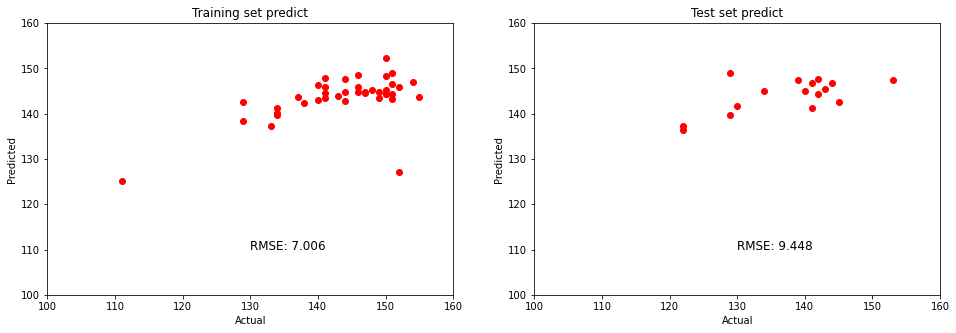

In [74]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [16,5]
fig,(ax1,ax2) = plt.subplots(1,2)
maxy = 160
miny = 100

ax1.plot(y_train,y_pred_train,'ro')
ax1.set_xlim(miny,maxy)
ax1.set_ylim(miny,maxy)
ax1.set_title("Training set predict")
ax1.set_ylabel("Predicted")
ax1.set_xlabel("Actual")
ax1.text(130,110,'RMSE: %.3f'%train_rmse,fontsize = 12)

ax2.plot(y_test,y_pred_test,'ro')
ax2.set_xlim(miny,maxy)
ax2.set_ylim(miny,maxy)
ax2.set_title("Test set predict")
ax2.set_ylabel("Predicted")
ax2.set_xlabel("Actual")
ax2.text(130,110,'RMSE: %.3f'%test_rmse,fontsize = 12)

## Question 2 (20 points)

As it turns out, there is one outlier in the training data, when Matt's heart rate monitor was not fixed correctly against the skin, resulting in a strange average heart rate.

**Do the following:**

1. **Plot pace (column 0) against heart rate ($\textbf{y}$) for the training data.**

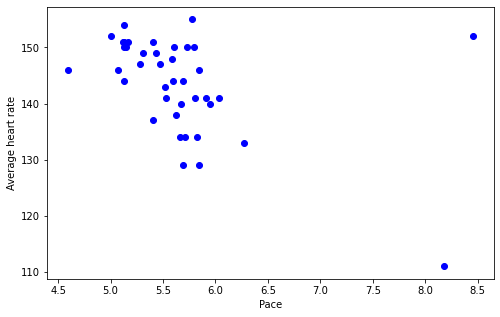

In [84]:
plt.figure(figsize=(8,5))
plt.plot(Xtrain[:,0],ytrain.T,'bo')
plt.ylabel("Average heart rate")
plt.xlabel("Pace")
plt.show()

2. **Give the outlier point's data here and explain why it does not seem to be consistent with the other data.**

The outlier point is the one in the upper right corner of the previous plot. The pace is very slow, so the heart rate should be correspondingly low (like the other point in the lower right corner of the plot) but it is not. The actual data point is the fourth row of Xtest and fourth element of ytest:

$$\textbf{x} = \begin{bmatrix} 8.46 & 5235 & 92.9 & 48.5 \end{bmatrix}^T,  \; y = 152$$

In [124]:
filter_arr = Xtrain[:,0] > 8.3
x = Xtrain[filter_arr]
index=np.where(Xtrain == x)[0][0]
y = ytrain[0,index]
print('X',x, 'y',y)

X [[   8.4602365 5235.3198      92.915001    48.527222 ]] y 152.0


3. **Build a new regression model without this point, and make a new plot of predicted versus actual heart rate for the training set and test set using the new parameters.**

In [141]:
X_new = np.delete(Xtrain,index,0)
y_new = np.delete(ytrain,index,1)
theta_new = LR(X_new,y_new )

m = Xtrain.shape[0]
n = Xtest.shape[0]
y_test = ytest.reshape(-1,1)
y_pred_test = predict(Xtest,theta_new)
y_train = y_new.reshape(-1,1)
y_pred_train = predict(X_new,theta_new)

train_rmse = np.sqrt(((y_pred_train - y_train).T@(y_pred_train - y_train))/m)
test_rmse = np.sqrt(((y_pred_test - y_test).T@(y_pred_test - y_test))/n)

Text(130, 110, 'RMSE: 8.943')

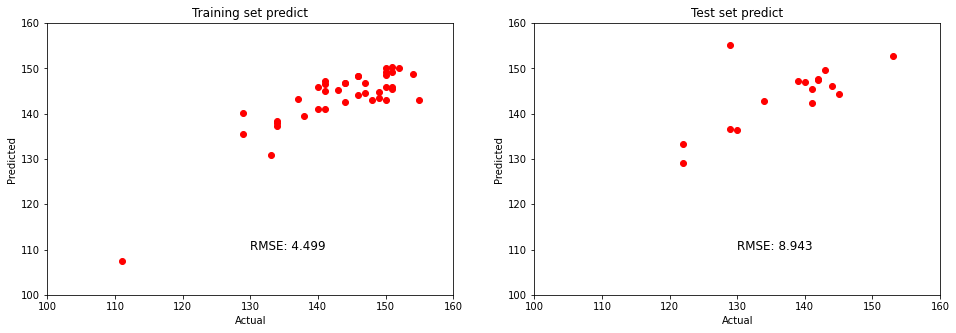

In [142]:
matplotlib.rcParams['figure.figsize'] = [16,5]
fig,(ax1,ax2) = plt.subplots(1,2)
maxy = 160
miny = 100


ax1.plot(y_train,y_pred_train,'ro')
ax1.set_xlim(miny,maxy)
ax1.set_ylim(miny,maxy)
ax1.set_title("Training set predict")
ax1.set_ylabel("Predicted")
ax1.set_xlabel("Actual")
ax1.text(130,110,'RMSE: %.3f'%train_rmse,fontsize = 12)

ax2.plot(y_test,y_pred_test,'ro')
ax2.set_xlim(miny,maxy)
ax2.set_ylim(miny,maxy)
ax2.set_title("Test set predict")
ax2.set_ylabel("Predicted")
ax2.set_xlabel("Actual")
ax2.text(130,110,'RMSE: %.3f'%test_rmse,fontsize = 12)

4. **Briefly discuss whether the result based on the "cleaned" dataset is better than the result on the original data set.**

The model based on the cleaned dataset is much better.

The original parameter estimate had a positive value for $\theta_1$, which says that as minutes per kilometer gets bigger (pace is slower), heart rate increases, which is counterintuitive.

The new parameter estimate has a negative value for the variable, as we would expect. The value of -11.9 says that if we speed up by one minute per kilometer, heart rate will increase by 12 beats per minute, which seems reasonable.

The RMSE on the training set decreased substantially, from 7.0 to 4.6. The test set RMSE also improved albeit not as much, from 9.4 to 8.9. We see that on the test set, the predictions seem to be higher than the actual rates.

## Question 3 (20 points)

Actually, the data in Questions 1 and 2 are not quite independent of each other, as they form a sequence. Performance in a sport improves with training over time.

Perhaps we can model the effect of training on performance by adding a new variable to the data set that is the number of days since the training began.

Create a new variable indicating the number of days that have passed since training began. Let's name this variable $x_5$, and let $x_4$ be the "hours of rest since the last run" variable (last column in the $\texttt{X}$ data set). Let $x_5^{(0)} = 0$, and let

$$x_5^{(i)} = \frac{1}{24}\sum_{j=1}^{i-1} x_4^{(i)}.$$ 

You can calculate this more easily using the recurrence

$$x_5^{(i)} = x_5^{(i-1)} + \frac{1}{24}x_4^{(i)}.$$ 

**Do the following:**

1. **Add the new variable $x_5$ to your test and training datasets. Note that the test data are just a continuation of the series from the training data, so $x_5$ for the first entry in the test set should be $x_5$ for the last entry in the training set plus the number of rest hours for the first entry in the test set divided by 24.**

2. **Build a new regression model using the augmented data set, give the optimal parameters $\mathbf{\theta}$ here, and show the scatter plot of predicted versus actual outcomes for the training set and test set.**

In [192]:
# add the new variable to X
list_ = [0]
x5 = 0
m = X_new.shape[0]
for i in range(m-1):
    x5 = x5 + X_new[i+1:i+2,3]/24
    list_.append(x5)
Xtrain_new = np.concatenate((X_new,np.vstack(list_)),1)

list_ = [0]
n = Xtest.shape[0]
x5 = Xtrain_new[-1,4]
for i in range(n-1):
    x5 = x5 + Xtest[i:i+1,3]/24
    list_.append(x5)
Xtest_new = np.concatenate((Xtest,np.vstack(list_)),1)

In [198]:
# add the new varialbe
m = X_new.shape[0]
XX = np.concatenate((X_new,np.zeros((m,1))),1)
for i in range(1,m):
    XX[i,4] = XX[i-1,4] + XX[i,3]/24

In [199]:
XX

array([[5.60412500e+00, 1.03862400e+04, 9.64800030e+01, 1.66931950e+02,
        0.00000000e+00],
       [4.59010360e+00, 3.35016990e+03, 9.00700000e+01, 1.40422220e+01,
        5.85092583e-01],
       [5.58534380e+00, 1.05894200e+04, 9.68949970e+01, 4.94805560e+01,
        2.64678242e+00],
       [5.27593140e+00, 1.02608300e+04, 8.04150010e+01, 6.93769450e+01,
        5.53748846e+00],
       [5.00500540e+00, 1.03080600e+04, 7.89950030e+01, 7.21544420e+01,
        8.54392354e+00],
       [5.16795870e+00, 1.02971400e+04, 8.42699970e+01, 2.42436100e+01,
        9.55407396e+00],
       [5.59096530e+00, 1.66286500e+04, 9.57549970e+01, 5.89102780e+01,
        1.20086689e+01],
       [5.31123880e+00, 1.03970300e+04, 9.18750000e+01, 1.26797220e+01,
        1.25369906e+01],
       [5.07047940e+00, 1.02666100e+04, 8.74899980e+01, 4.84661100e+01,
        1.45564119e+01],
       [5.12978360e+00, 8.69984960e+03, 8.65100020e+01, 4.75988880e+01,
        1.65396989e+01],
       [5.80922510e+00, 2.1145

The new parameter estimate has a negative load on number of training days, indicating that, as we might expect, when the number of training days increases, the heart rate is decreasing. The value of -0.05 says that every 20 days of training reduces the heart rate by 1 beat per minute. That seems like a small effect, but interestingly, though training RMSE only improves slightly with this variable, from 4.56 to 4.48, test RMSE improves quite a bit, from 8.94 to 7.40. The test set has bigger values for the "days of training" variable, so it has more effect on the test set.

Lastly, we see that the model is still overpredicting heart rate on the test set, indicating that there is still something missing in our predictors. We might consider adding a "volume of training" variable that reflects the amount of training in the past week or so.

## Question 4 (20 points)

Next we consider a classification problem. We know that logistic regression is only capable of modeling linear classification boundaries. In this question, you will synthesize a data set that has a nonlinear classification boundary then show that we can obtain a good logistic regression classifier by transforming the data so that an appropriate classification boundary is linear in the new transformed inputs.

**Do the following:**

1. **Generate 100 data points for class 1 in which $x_1$ is sampled uniformly from the range [-3..3] and $x_2$ is sampled from a Gaussian with mean $x_1^2 + 2$ and standard deviation 1.0.**

2. **Generate 100 data points for class 2 in which $x_1$ is sampled uniformly from the range [-3..3] and $x_2$ is sampled from a Gaussian with mean $x_1^2 + 5$ and standard deviation 1.0.**

3. **Split the dataset into 80% train and 20% test, estimate a logistic regression model, and report the model's training set accuracy, test set accuracy, and optimal parameters here:**

4. **Transform the data to contain five input variables: $x_1$, $x_2$, $x_1^2$, $x_2^2$, and $x_1x_2$. Build a new logistic regression model, report its training and test set accuracy, and optimal parameters here:**

## Question 5 (20 points)

Suppose you were interested in predicting the number of traffic fatalities that occur at a given traffic intersection based on various factors that might indicate the level of danger at that intersection: number of lanes, speed limit, types and number of businesses close to the intersection, curvature of the roads leading to the intersection, number of people that live in the surrounding area, and so on.

Imagine that you obtain monthly fatality counts for 500 intersections in Bangkok and also obtain the necessary input data on the characteristics of the intersections then start to model.

The standard linear regression model would consider the outcome (the number of traffic fatalities per month) as a Gaussian random variable with a mean of $\mathbf{\theta}^T\mathbf{x}$. But that might not be the best approach for this problem.

For example, you might consider the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution).

**Do the following.**

1. **Read briefly about the Poisson distribution and explain here why it would be a better model of the outcome (number of traffic fatalities per month at a particular intersection) than a Gaussian.**

2. **Noting that the Poisson distribution is a member of the exponential family, explain in general how you could use the GLM approach to come up with a model that predicts the fatality rate to be a Poisson random variable with mean** $\lambda = \exp(\mathbf{\theta}^T\textbf{x})$. **(Note that the exponential here is just to convert the linear combination of inputs, which could be positive or negative, to a strictly positive value.)**

Note that for part 2, *you do not need to derive any equations*! Just explain what steps you would take to obtain a good machine learning algorithm for this problem.
